In [1]:
import geopandas as gpd

buildings = gpd.read_parquet('./../data/platform/buildings.parquet').rename(columns={
    'building_area' : 'footprint_area',
    'storeys_count' : 'number_of_floors',
    'population_balanced': 'population',
})

In [2]:
from blocksnet.preprocessing.imputing import impute_buildings

gdf = impute_buildings(buildings)

2025-03-20 19:05:56.926 | WARNING  | blocksnet.preprocessing.imputing.buildings.schemas:_before_validate:20 - Column build_floor_area not found and will be set None
2025-03-20 19:05:56.927 | WARNING  | blocksnet.preprocessing.imputing.buildings.schemas:_before_validate:20 - Column non_living_area not found and will be set None


In [3]:
gdf.head()

,geometry,is_living,number_of_floors,footprint_area,build_floor_area,living_area,non_living_area,population
0,"POLYGON ((26319.490 6682759.262, 26315.099 668...",True,1.0,95.155945,95.155945,66.609161,28.546783,3.0
1,"POLYGON ((26247.648 6682735.641, 26255.964 668...",True,1.0,97.709000,97.709000,68.396301,29.312698,3.0
2,"POLYGON ((25121.683 6682189.882, 25110.493 668...",True,20.0,706.651001,14133.020020,9893.114260,4239.905760,144.0
3,"POLYGON ((25099.575 6681917.845, 25097.969 668...",True,25.0,721.190125,18029.753125,12620.827100,5408.926025,235.0
4,"POLYGON ((25138.368 6681976.699, 25150.524 668...",True,21.0,1543.230220,32407.834620,22685.484400,9722.350220,337.0


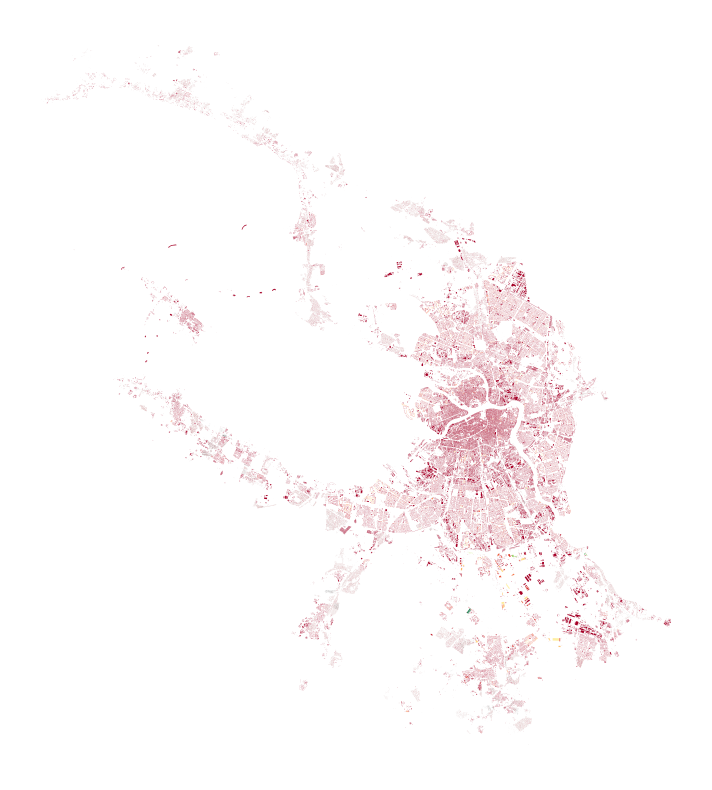

In [4]:
gdf.plot('living_area', cmap='RdYlGn', figsize=(10,10)).set_axis_off()